## Spike Challenge Precio
### Franco Betteo

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
%load_ext autoreload
%autoreload 2

### 1. Datos
TODO: better display

In [4]:
precipitaciones = pd.read_csv("precipitaciones.csv")
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [5]:
banco_central = pd.read_csv("banco_central.csv")
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.

### 2. Análisis de datos. Creación de variables

In [42]:
pd.to_datetime(precipitaciones.date).dt.year

0      1989
1      1998
2      2001
3      2008
4      2009
       ... 
491    1988
492    2019
493    2015
494    2016
495    1982
Name: date, Length: 496, dtype: int64

In [152]:
precipitaciones['anio'] = pd.to_datetime(precipitaciones.date).dt.year
precipitaciones['mes'] = pd.to_datetime(precipitaciones.date).dt.month
precipitaciones.drop_duplicates(inplace=True)
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,anio,mes
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789,1999.169355,6.467742
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615,11.945142,3.461617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127,1979.000000,1.000000
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643,1989.000000,3.000000
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940,1999.000000,6.000000
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590,2009.250000,9.000000
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673,2020.000000,12.000000


In [7]:
precipitaciones_long = pd.melt(precipitaciones, id_vars="date", var_name="region", value_name="precipitaciones")

In [8]:
descripcion_precipitaciones = precipitaciones_long.groupby("region").agg({'date': ['min', 'max', 'count'],
                                                           'precipitaciones': ['min', 'max', 'mean', 'median', utils.count_na]
                                                            })
descripcion_precipitaciones.columns = ["_".join(pair) for pair in descripcion_precipitaciones.columns]
descripcion_precipitaciones.reset_index()                                                    

,region,date_min,date_max,date_count,precipitaciones_min,precipitaciones_max,precipitaciones_mean,precipitaciones_median,precipitaciones_count_na
0,Biobio,1979-01-01,2020-04-01,496,0.001170,702.434707,128.113406,79.558557,0
1,Coquimbo,1979-01-01,2020-04-01,496,0.000000,347.133889,16.154691,4.071036,0
2,La_Araucania,1979-01-01,2020-04-01,496,0.005331,661.211203,151.486456,110.570990,0
3,Libertador_Gral__Bernardo_O_Higgins,1979-01-01,2020-04-01,496,0.000000,645.515752,72.249805,25.995969,0
4,Los_Rios,1979-01-01,2020-04-01,496,0.748127,717.735673,199.451789,159.467940,0
5,Maule,1979-01-01,2020-04-01,496,0.000000,759.177712,98.662773,45.649888,0
6,Metropolitana_de_Santiago,1979-01-01,2020-04-01,496,0.000000,524.592667,49.666682,19.087592,0
7,Valparaiso,1979-01-01,2020-04-01,496,0.000000,441.048604,32.450980,9.037825,0


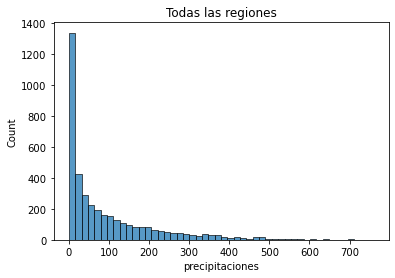

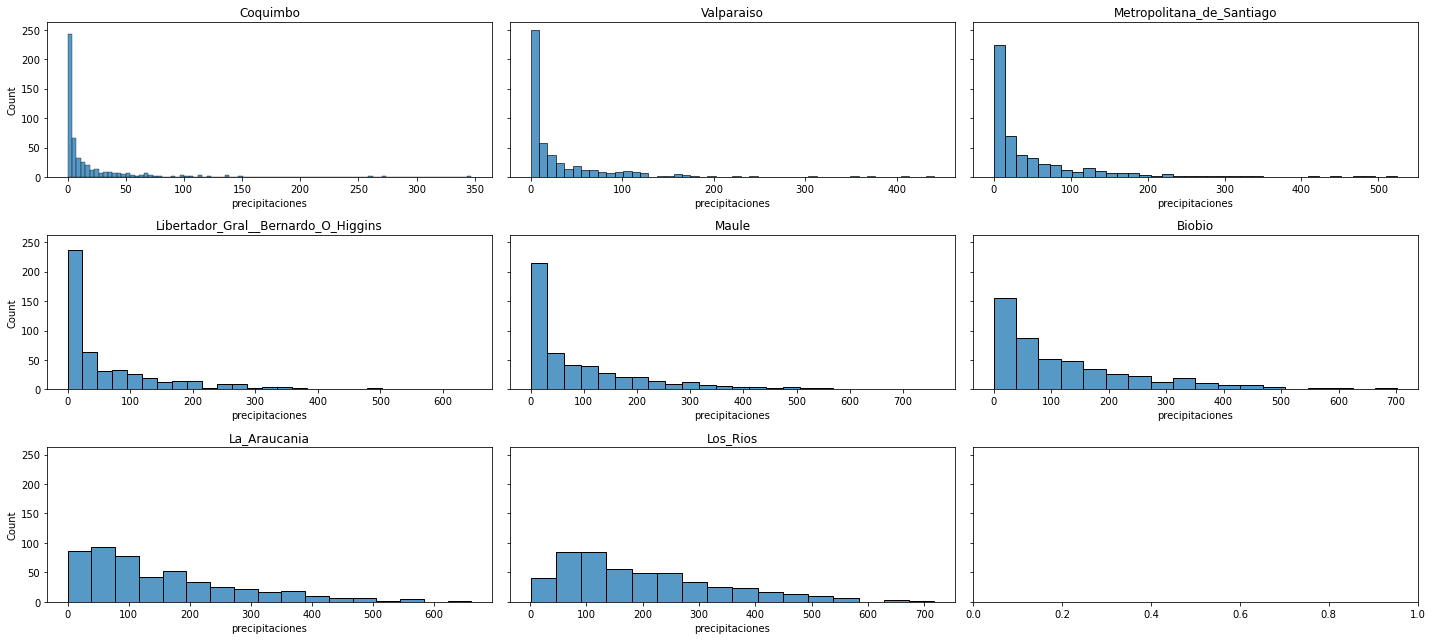

In [9]:
utils.plot_hist_precipitaciones(precipitaciones_long)
plt.title("Todas las regiones")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_hist_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

In [10]:
banco_central.shape

(614, 85)

In [153]:
banco_central_clean = banco_central.copy(deep=True)

# remover separador de miles con punto (excepto Periodo)
banco_central_clean = banco_central.apply(lambda x: x.astype('str').str.replace("\.","", regex=True) if x.name in banco_central.columns[1:] else x)
# reemplazar caracteres por Nan  (excepto Periodo)
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('str').str.replace("[a-zA-Z]+","NaN", regex=True) if x.name in banco_central.columns[1:] else x)
# convierto a numerico, Nan en los vacíos
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('float') if x.name in banco_central.columns[1:] else x)
# fix de mes 13 en 2020, deberia ser 12
banco_central_clean['Periodo'] = np.where(banco_central_clean['Periodo']=="2020-13-01 00:00:00 UTC", "2020-12-01 00:00:00 UTC", banco_central_clean['Periodo'])
banco_central_clean['anio'] = pd.to_datetime(banco_central_clean.Periodo).dt.year
banco_central_clean['mes'] = pd.to_datetime(banco_central_clean.Periodo).dt.month

banco_central_clean.drop_duplicates(inplace=True)

In [154]:
banco_central_clean.apply([lambda x: x.min(skipna=True), 'max', 'mean', utils.count_na], 0)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,anio,mes
<lambda>,1970-01-01 00:00:00 UTC,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,1.039671e+07,1.271215e+06,1.035881e+07,1.292978e+06,1.358560e+05,3.005438e+06,1.739666e+06,2.477710e+07,6.407887e+06,1.008940e+05,9.841677e+06,1.690736e+06,6.502213e+06,1.995621e+07,2.808115e+06,1.072958e+07,1.118740e+05,2.525630e+05,6.350730e+05,4.420184e+06,5.691837e+06,1.139389e+07,8.045511e+07,11575567.0,5.196854e+06,1.158010e+05,9452492.0,5.852693e+06,1.108406e+07,9.900000e+01,401.000000,15.000000,1.000000e+00,1334.000000,26.000000,186.000000,4.346090e+05,113.000000,450.000000,4.701000e+03,8.156196e+06,6.251775e+07,2.630406e+06,7.456535e+07,3.516149e+07,2.165196e+06,2.933080e+05,6.865296e+06,1.656582e+06,1.453648e+07,5.036122e+07,3.304888e+06,6.859292e+07,1.561431e+06,3.966499e+07,4.672877e+06,7.420130e+05,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,0.000000e+00,26169553.0,1.205000e+03,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,46580.000000,1970.0,1.0
max,2020-12-01 00:00:00 UTC,9.99

In [155]:
set([x[0]  for x in banco_central_clean.columns.str.split("_")])

{'Derechos',
 'Generacion',
 'Imacec',
 'Impuesto',
 'Indice',
 'No',
 'Ocupacion',
 'Ocupados',
 'PIB',
 'Periodo',
 'Precio',
 'Tipo',
 'Ventas',
 'anio',
 'mes'}

In [176]:
banco_central_clean.loc[:,banco_central_clean.columns.str.startswith('Impuesto')]

,Impuesto_al_valor_agregado
0,896688023.0
1,901755563.0
2,913850432.0
3,883855814.0
4,912662417.0
...,...
609,NaN
610,NaN
611,NaN
612,NaN


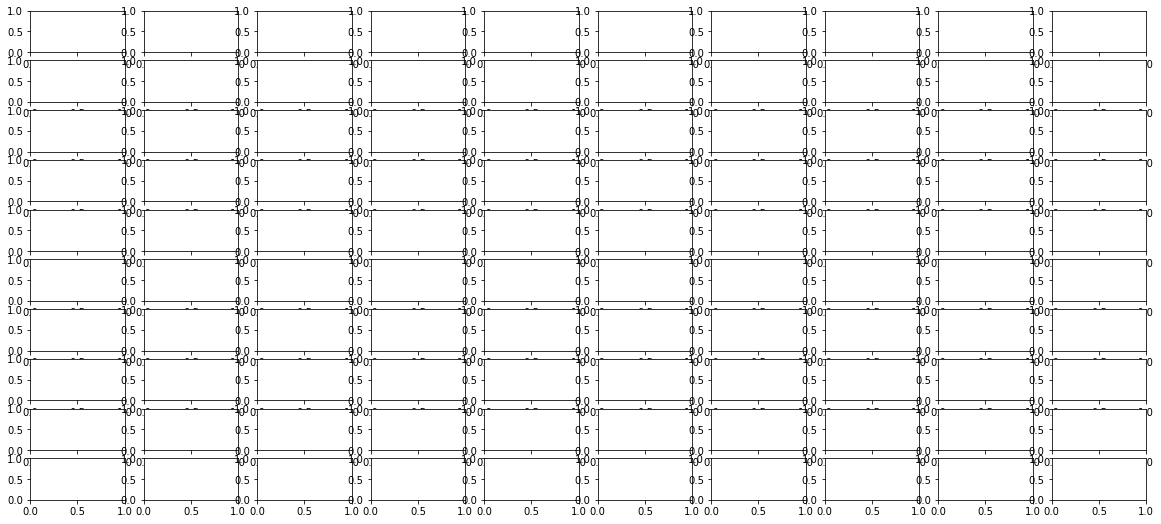

In [156]:
# Visualizar de alguna manera todas las variables?
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,9))
ax = ax.flatten()

# for i,col in  enumerate(banco_central_clean.columns[1:]):
#     sns.boxplot(data=banco_central_clean, x=col, orient="v", ax=ax[i])


In [157]:
banco_central_long = pd.melt(banco_central_clean, id_vars="Periodo", var_name="variable", value_name="valor")

In [158]:
banco_central_long.head()

,Periodo,variable,valor
0,2013-03-01 00:00:00 UTC,Imacec_empalmado,102796218.0
1,2013-04-01 00:00:00 UTC,Imacec_empalmado,101664842.0
2,2013-05-01 00:00:00 UTC,Imacec_empalmado,101642954.0
3,2013-06-01 00:00:00 UTC,Imacec_empalmado,998310201.0
4,2013-07-01 00:00:00 UTC,Imacec_empalmado,964696194.0


In [17]:
### SEGUIR ESTO
# Parece que segun el tipo de variable  el periodo con datos cambia.
# los numeros estan con punto separando miles
# solo 9 filas tienen todo completo


In [159]:
banco_central_clean.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,anio,mes
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.990000e+02,2.980000e+02,2.980000e+02,2.980000e+02,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.400000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,5.920000e+02,611.000000,611.000000,6.110000e+02,170.000000,251.000000,251.000000,2.510000e+02,451.000000,155.000000,4.600000e+02,1.280000e+02,9.200000e+01,9.300000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,9.200000e+01,1.000000e+01,3.110000e+02,4.180000e+02,1.420000e+02,3.700000e+02,8.200000e+01,3.580000e+02,2.620000e+02,8.200000e+01,8.200000e+01,8.300000e+01,143.000000,612.000000,612.000000
mean,5.072617e+08,6.131057e+08,6.463457e+08,6.1561

### 3. Visualizaciones

In [161]:
precipitaciones_long.query('region=="Metropolitana_de_Santiago"')

,date,region,precipitaciones,year,month
992,1989-02-01,Metropolitana_de_Santiago,0.028272,1989,2
993,1998-10-01,Metropolitana_de_Santiago,0.011493,1998,10
994,2001-02-01,Metropolitana_de_Santiago,0.002634,2001,2
995,2008-11-01,Metropolitana_de_Santiago,0.015872,2008,11
996,2009-04-01,Metropolitana_de_Santiago,0.009396,2009,4
...,...,...,...,...,...
1483,1988-10-01,Metropolitana_de_Santiago,4.621711,1988,10
1484,2019-08-01,Metropolitana_de_Santiago,4.509748,2019,8
1485,2015-06-01,Metropolitana_de_Santiago,4.888708,2015,6
1486,2016-09-01,Metropolitana_de_Santiago,1.066980,2016,9


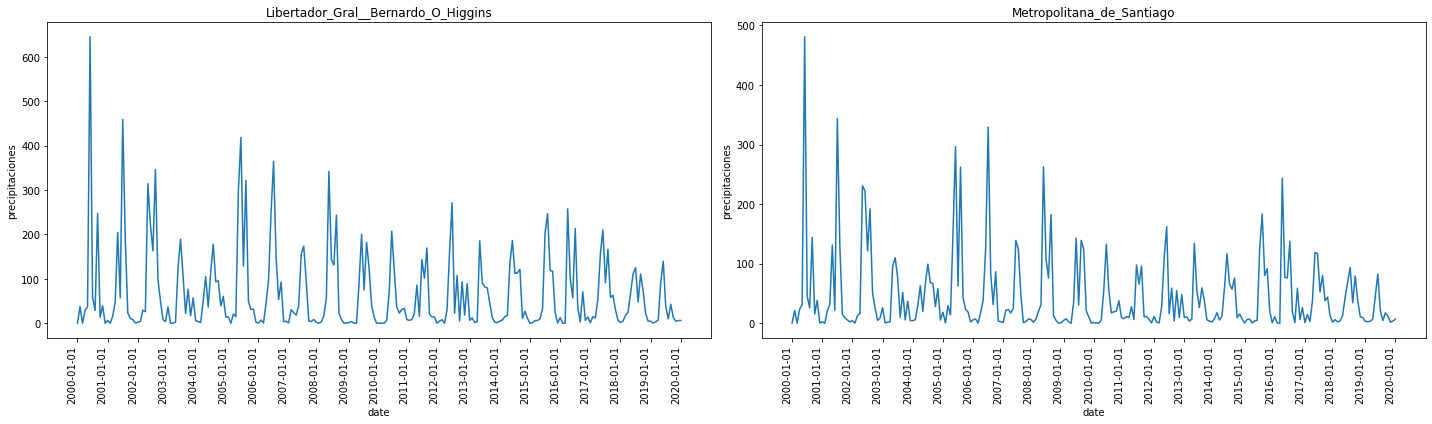

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax = ax.flatten()

for i, region in enumerate(['Libertador_Gral__Bernardo_O_Higgins', 'Metropolitana_de_Santiago']):
    utils.plot_line_precipitaciones(precipitaciones_long, region=region, desde="2000-01-01", hasta="2020-01-01", ax=ax[i])
    
fig.autofmt_xdate(rotation=90)
plt.tight_layout()

In [22]:
# Completar comentarios

d:\Data Science\spike\utils.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',


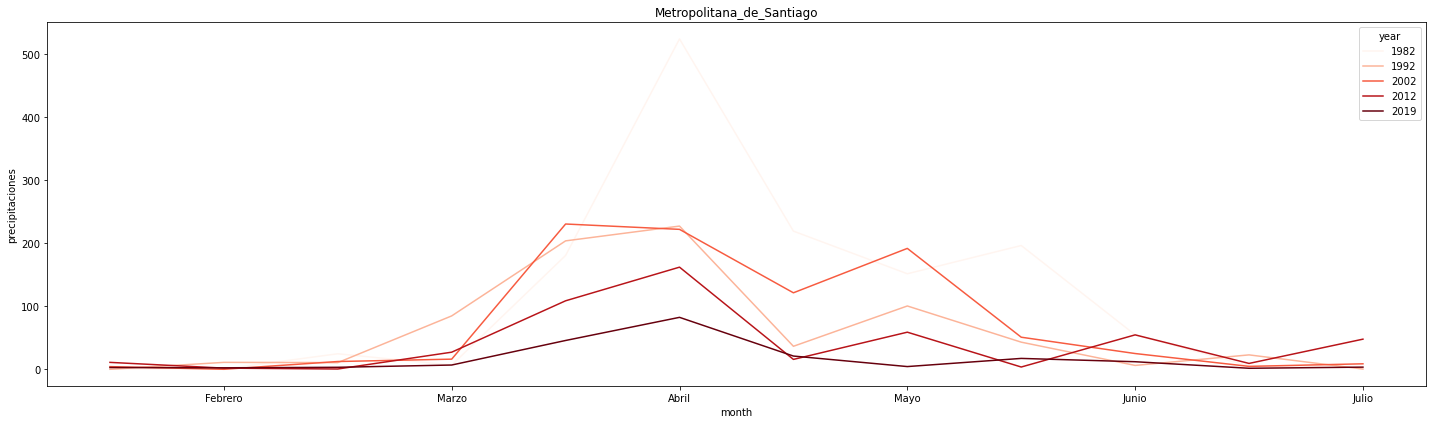

In [163]:
## CORREGIR MESES EN XTICKLABELS y COLORES
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))
# ax = ax.flatten()

years = [1982,1992,2002,2012,2019]
utils.plot_precipitaciones_mensuales(precipitaciones_long, region="Metropolitana_de_Santiago", years=years, ax=ax)

plt.tight_layout();

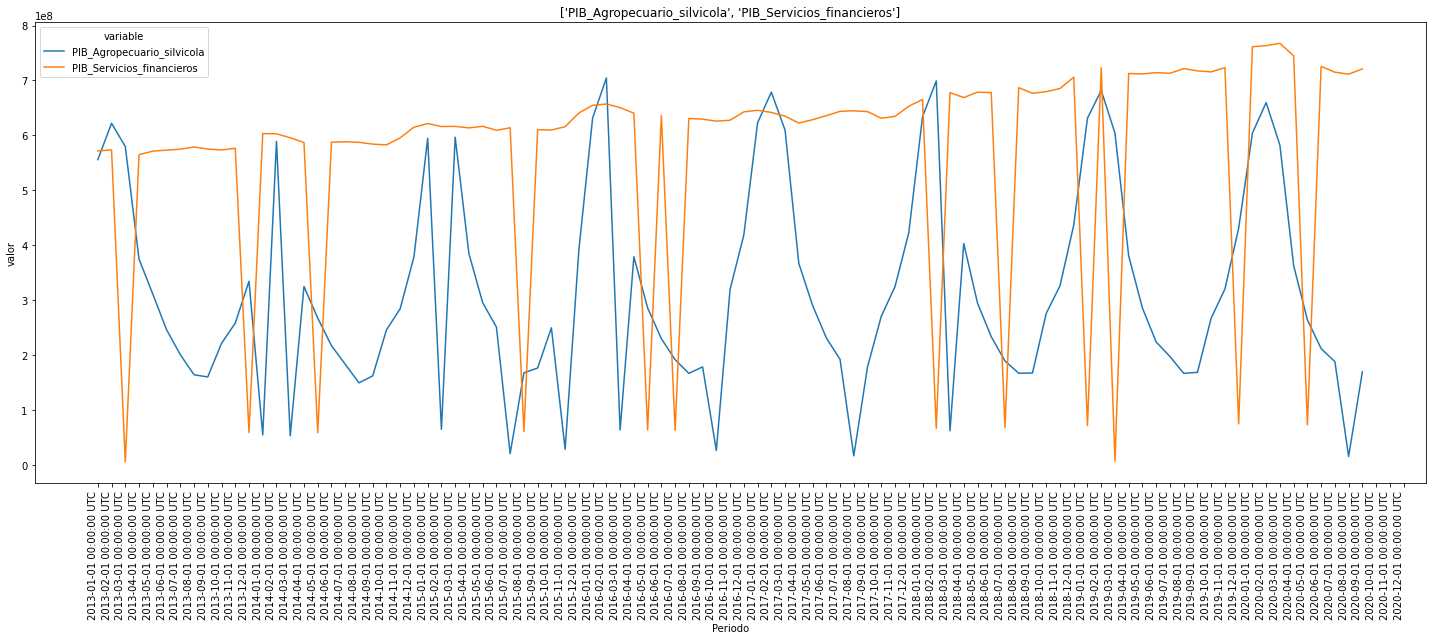

In [164]:
# validar que este bien
fig, ax = plt.subplots(1,1, figsize=(20,9))
utils.plot_pbi(banco_central_long, series=['PIB_Agropecuario_silvicola','PIB_Servicios_financieros'], desde="2013-01-01", hasta="2022-01-01", ax=ax)

fig.autofmt_xdate(rotation=90)
plt.tight_layout()

In [25]:
# agregar comentarios

### 4. Tratamiento y creación de variables

Al ser todas variables numéricas continuas uno puede calcular los coeficientes de correlación de a pares, siempre y cuando respeten el mismo ordenamiento de fechas.
Tanto Pearson como Spearman son válidas para este escenario, la primera mide correlación lineal mientras que la segunda mira correlación de rankings y permite captar otro tipo de asociaciones.
El impacto depende del modelo seleccionado pero idealmente se busca baja correlación entre los predictores para facilitar el entrenamiento (problemas numéricos, de interpretación, etc), es decir,  no suma tener dos variables que proveen la misma información.  
Tener series con comportamientos distintos puede aportar de distintas maneras a la predicción de nuestra serie target.
Por otro lado, tener una serie que correlacione bien con nuestra serie target es siempre útil porque ya nos da mucha información acerca de lo que queremos predecir.

In [165]:
leche = pd.read_csv("precio_leche.csv")
leche.rename(columns={'Anio':'anio',
                       'Mes':'mes_abr'}, inplace=True)
leche['mes'] = leche['mes_abr'].apply(lambda x: np.select(
        condlist=[x=='Ene', x=='Feb', x=='Mar', x=='Abr', x=='May', x=='Jun', x=='Jul', x=='Ago', x=='Sep', x=='Oct', x=='Nov', x=='Dic'],
        choicelist= np.arange(1,13),
        default=None))
leche['trimestre'] = pd.to_datetime(leche.mes, format="%m").dt.quarter        
leche.head(10)


,anio,mes_abr,Precio_leche,mes,trimestre
0,1979,Ene,3.85,1,1
1,1979,Feb,4.58,2,1
2,1979,Mar,5.18,3,1
3,1979,Abr,6.06,4,2
4,1979,May,7.25,5,2
5,1979,Jun,7.71,6,2
6,1979,Jul,8.10,7,3
7,1979,Ago,7.65,8,3
8,1979,Sep,6.96,9,3
9,1979,Oct,5.79,10,4


In [166]:
# merge
df_full = leche.merge(precipitaciones, how='left', on=['anio','mes']).merge(banco_central_clean, how='left', on=['anio', 'mes'])
df_full.head()

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1979,Ene,3.85,1,1,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447,1979-01-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13672.0,22727.0,626.0,752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,Feb,4.58,2,1,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039,1979-02-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16713.0,24567.0,742.0,882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,Mar,5.18,3,1,1979-03-01,0.255

In [187]:
# Correlacion
corr = df_full.corr()
corr_reduced = corr.reset_index().melt(id_vars="index", value_name='corr').query('corr < 1 and corr > -1').sort_values('corr')

In [188]:
corr_reduced['combined'] = corr_reduced['index'] + corr_reduced.variable
corr_reduced['combined_to_drop'] =  corr_reduced.apply(lambda x: "".join(sorted(list(x.combined))), axis=1)
corr_reduced = corr_reduced.drop_duplicates('combined_to_drop')
corr_reduced = corr_reduced[['index', 'variable', 'corr']]

In [189]:
corr_reduced

,index,variable,corr
8070,Metropolitana_de_Santiago,No_sabe__No_responde_Miles_de_personas,-0.949799
564,No_sabe__No_responde_Miles_de_personas,Valparaiso,-0.948845
756,No_sabe__No_responde_Miles_de_personas,Libertador_Gral__Bernardo_O_Higgins,-0.901976
852,No_sabe__No_responde_Miles_de_personas,Maule,-0.850002
1044,No_sabe__No_responde_Miles_de_personas,La_Araucania,-0.823791
...,...,...,...
874,La_Araucania,Biobio,0.970236
290,mes,trimestre,0.971780
96,anio,Precio_leche,0.973218
1066,La_Araucania,Los_Rios,0.974393


In [191]:
# Correlacion con target
corr_reduced.query('index == "Precio_leche" or variable=="Precio_leche"').sort_values('corr', ascending=False).head(25)

,index,variable,corr
96,anio,Precio_leche,0.973218
5089,Precio_leche,Precio_de_la_onza_troy_de_plata_dolaresoz,0.788014
150,Precio_del_cobre_refinado_BML_dolareslibra,Precio_leche,0.787816
147,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_leche,0.690898
5665,Precio_leche,Precio_del_petroleo_WTI_dolaresbarril,0.689660
4993,Precio_leche,Precio_de_la_onza_troy_de_oro_dolaresoz,0.687773
5473,Precio_leche,Precio_del_petroleo_Brent_dolaresbarril,0.352386
5569,Precio_leche,Precio_del_kerosene_dolaresm3,0.304530
182,Indice_de_tipo_de_cambio_real___TCR_promedio_1...,Precio_leche,0.276890
7297,Precio_leche,Ocupacion_en_Suministro_de_agua_evacuacion_de_...,0.276595


<AxesSubplot:>

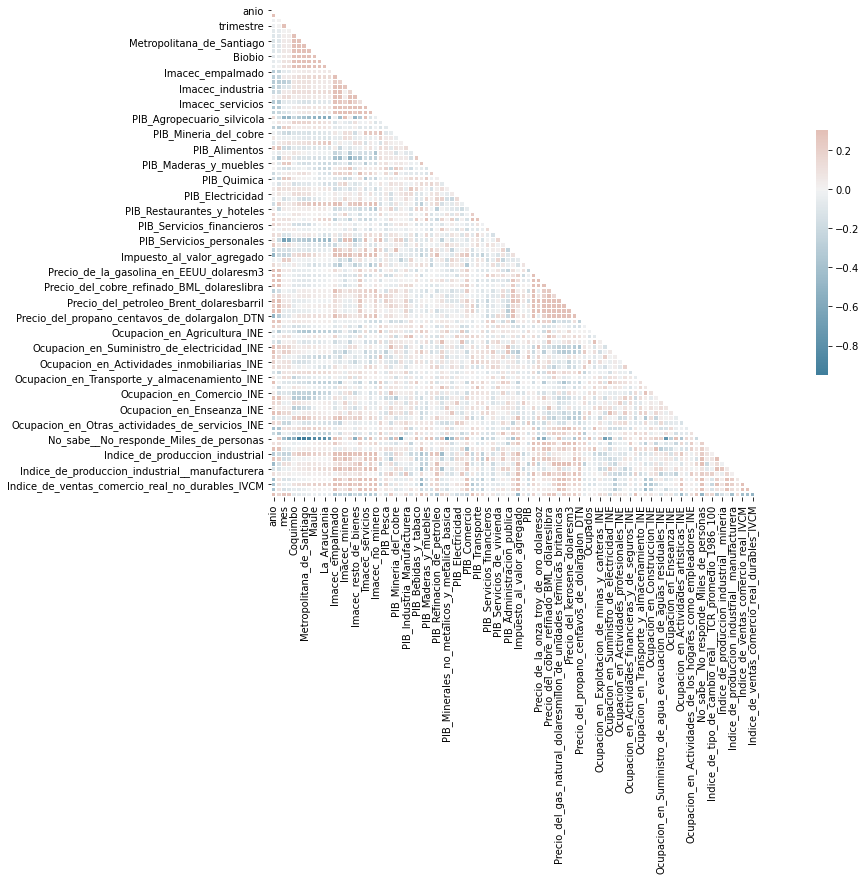

In [193]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# es dificil visualizar pero parece que lluvias correlacionan entre si al igual que Imacec, Precios y los indices. Por otra parte los PIB y ocupacion son mas dispersos ya que cada sector tendrá su propia diánámica (?)

In [34]:

# medias moviles
# acumuladas
# no olvidar el shift

### 5. Modelo


<AxesSubplot:xlabel='anio', ylabel='Precio_leche'>

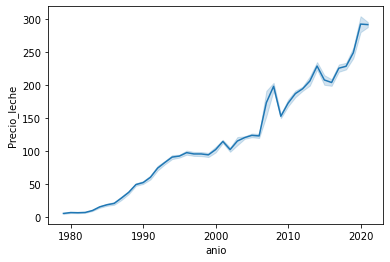

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=1)

sns.lineplot(data=leche, x="anio", y='Precio_leche')

In [185]:
df_full.sort_values('Periodo', ascending=False).head(5)

,anio,mes_abr,Precio_leche,mes,trimestre,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
503,2020,Dic,287.29,12,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,803222345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114754323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203443234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893234345.0,NaN
502,2020,Nov,288.09,11,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29756846.0,186635.0,240693.0,320395083.0,12139.0,26087.0,4323.0,29146544.0,411.0,54664.0,762884762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11201619.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294860.0
501,2020,Oct,274.32,10,4,NaN,NaN,NaN,NaN,NaN,NaN,N

In [211]:
list(df_full.columns[df_full.columns.str.startswith("Precio")].values) 

['Precio_leche',
 'Precio_de_la_gasolina_en_EEUU_dolaresm3',
 'Precio_de_la_onza_troy_de_oro_dolaresoz',
 'Precio_de_la_onza_troy_de_plata_dolaresoz',
 'Precio_del_cobre_refinado_BML_dolareslibra',
 'Precio_del_diesel_centavos_de_dolargalon',
 'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
 'Precio_del_petroleo_Brent_dolaresbarril',
 'Precio_del_kerosene_dolaresm3',
 'Precio_del_petroleo_WTI_dolaresbarril',
 'Precio_del_propano_centavos_de_dolargalon_DTN',
 'asd']

In [212]:
columnas = ['Precio_leche', 'anio', 'mes', 'trimestre', 'Imacec_empalmado', 'PIB', 'PIB_Alimentos',"Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100", "Indice_de_produccion_industrial__manufacturera"] + list(df_full.columns[df_full.columns.str.startswith("Precio")].values) 
df_model = df_full.loc[:, columnas]

In [215]:
df_model.sort_values(['anio', 'mes'], ascending=False).head(20)

,Precio_leche,anio,mes,trimestre,Imacec_empalmado,PIB,PIB_Alimentos,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial__manufacturera,Precio_leche,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN
505,295.24,2021,2,1,NaN,NaN,NaN,NaN,NaN,295.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,287.60,2021,1,1,NaN,NaN,NaN,NaN,NaN,287.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,287.29,2020,12,4,NaN,NaN,NaN,NaN,NaN,287.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,288.09,2020,11,4,NaN,NaN,NaN,NaN,NaN,288.09,29756846.0,186635.0,240693.0,320395083.0,12139.0,26087.0,4323.0,29146544.0,411.0,54664.0
501,274.32,2020,10,4,108402879.0,NaN,NaN,102554585.0,10824254.0,274.32,30028972.0,190036.0,241857.0,304035653.0,11115.0,2201.0,4047.0,2672383.0,3953.0,52506.0
500,278.99,2020,9,3,103201091.0,118574799.0,334311036.0,100765123.0,972476933.0,278.99,30850634.0,192335.0,257916.0,30447292.0,10852.0,19186.0,4109.0,25854612.0,396.0,49387.0
499,309.44,2020,8,3,101314552.0,116407225.0,348252328.0,10151671.0,960377084.0,309.44,3180968.0,196978.0,270033.0,294688379.0,11913.0,23017.0,4426.0,29112198.0,4236.0,5056.0
498,313.30,2020,7,3,966693225.0,111070003.0,369570934.0,100164187.0,946859919.0,313.30,30523026.0,184637.0,205899.0,288204663.0,11917.0,17352.0,4281.0,27907446.0,4075.0,4921.0
497,315.76,2020,6,2,968929046.0,111326892.0,350338849.0,100561281.0,894644274.0,315.76,29032938.0,173615.0,177226.0,260473102.0,10884.0,16128.0,3993.0,2534999.0,383.0,49608.0
496,318.88,2020,5,2,982393209.0,112873882.0,361867184.0,101774069.0,928877962.0,318.88,22116182.0,171866.0,163103.0,237404518.0,8416.0,17525.0,3102.0,18583828.0,2856.0,41538.0
